# LEADING CANCER SITES

## Introduction And Project Scope

In the previous project i.e. Leading Causes of Deaths in USA, we implemented data management techniques using Pandas on two datasets (1. NCHS - leading causes of deaths, containing number of deaths and its cause in USA and 2. nst -est2018-01 which had the details about the population of US over the years), to find the top 4 causes of death faced by Americans. The said top death causes found were:  1) Heart Disease
                          2) Cancer
                          3) Stroke
                          4) CLRD

Among these top 4 causes, Cancer being the 2nd largest cause of death in USA, the focus of this project will be to determine the leading cancer sites / cancer types diagnosed in the selected population and time period in USA.

The question we are addressing, related to the top 10 cancer sites for Americans over the years will be done in 2 sub parts:

    A) What are the over all Leading 10 Cancer Sites for Americans?
    B) What are the year wise 10 Leading Cancer Sites for Americans?

## Data Collection

For the purpose of this project we collected data regarding the USA Cancer Statistics, Incidence Reports for the period 2010 to 2016 which was available on the website of "Centers for Disease Control and Prevention" in addition to the population data set provided to us previously. Thus the following datasets were used in this project:

    1) US Cancer typewise stats, 2010-2016. (website ref: https://wonder.cdc.gov/controller/datarequest/D160)
    2) nst-est2018-01  
The first data set contains the details about yearwise and statewise leading cancer sites and count of incidence reported for the period 2010 to 2016. While the second dataset consists of details related to year wise and statewise population of US for the period 2010 t0 2017.

## Code, Explanation and Analysis

### Preliminary Steps

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data reading, merging and data cleaning

In [2]:
# Reading the nst-est2018-01 dataset
file = 'C:/RIT/Spring 2021\BANA 680 - Data Management for Business Analytics/Assignment 1/nst-est2018-01.xlsx'
pop_data = pd.read_excel(file)
pop_df = pd.DataFrame(pop_data)

In [3]:
# Reading the US Cancer typewise stats dataset and converting it to dataframe
Cancer_types = 'C:/RIT/Spring 2021/BANA 680 - Data Management for Business Analytics/Final/US Cancer typewise stats, 2010 - 2016.txt'
df_can_typ = pd.DataFrame(pd.read_csv(Cancer_types, delimiter = "\t"))

To check and handle missing values as well as displaying the for unique states and cancer types in the df, we execute the following commands:

In [4]:
print('Number of missing values in each column:', '\n', df_can_typ.isnull().sum())

Number of missing values in each column: 
 Notes                        7784
States                         57
States Code                    57
Year                           57
Year Code                      57
Leading Cancer Sites           57
Leading Cancer Sites Code      57
Count                          57
dtype: int64


In [5]:
# Dropping column 'Notes' from the df
df_can_typ = df_can_typ.drop('Notes', axis = 1)
# dropping rows with missing values
is_NaN = df_can_typ. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df_can_typ[row_has_NaN]
#print(rows_with_NaN)
df_cleaned = df_can_typ.dropna(subset = ['Year'])

In [6]:
# Number of unique cancer sites and states included in cleaned df:
print('Number of leading cancer sites:', '\t' , len(pd.unique(df_cleaned['Leading Cancer Sites'])))
print('Number of States:', '\t', len(pd.unique(df_cleaned['States'])))

Number of leading cancer sites: 	 22
Number of States: 	 51


### Analyzing the trend in reported cancer incidence over the years

In order to analyze the trend in cancer incidences, we need to look at the yearly reported incidence count for USA as whole and ignore the data for individual states. Also, since the population differs for each year, we need to standarized the death count for each year in order to be compared fairly.
##### Steps:
- We need the total number of deaths per year in order to analyze the death trend over the years. For this, we will apply groupby function of the df_cleaned to group it by year and aggregate the count of incidence for each year.
- We know that population differs for each year. So in order to have fair comparision of incidene count over the years, we need to standarized the count variable. For this, we will extract the population data from the second df i.e. pop_df and use it to normalize the incidence count over the years.
- The final goal to analyze the cancer incidence trend is to compute the number of incidence per year and then normalize it by dividing it by population for the year so that the effect of population is ignored.

In [7]:
# Create a new df with just year wise count of cancer incidence in US
df_year = df_cleaned.groupby(['Year']).agg({'Count': sum})

In [8]:
#Creating a new pop_us dataframe with just year and population column from the original pop_df created above for 
#purpose of merging it in the next step.
pop_us = pd.DataFrame({'Year' : pop_df.iloc[2, 3:], 'Population' : pop_df.iloc[3, 3:]})
# merging the df_year with pop_us in order to add the population column for each year
merge_year = pd.merge(df_year, pop_us, on = 'Year', how = 'inner')

In [9]:
# adding a new column: 'Count per Million' i.e. CPM, for standarizing the incidence count to make it comparable.
merge_year['CPM'] = (merge_year['Count']/merge_year['Population'])*1000000
merge_year.head(2)

,Year,Count,Population,CPM
0,2010.0,1420850.0,309326085,4593.37
1,2011.0,1453057.0,3.1158e+08,4663.51


#### From the above output we can see that there is an increasing trend in Cancer incidences reported in US over the period.

### (A) 10 Leading Cancer sites over the years in US

In order to determine the leading 10 cancer sites in US, we will used the df_cleaned created.

We will create a new df say df_topsites by grouping the df_cleaned on 'Leading cancer sites' and aggregating the count for each site.
Then we will sort the count values in descending order and create a new df say df_cs_top10, which will contain the details of cancer sites having highest incidence count over the years.

In [10]:
# Groupby cancer sites and agg of count
df_topsites = df_cleaned.groupby(['Leading Cancer Sites']).sum()['Count'].reset_index()
df_cs_top10 = df_topsites.sort_values(['Count'], ascending = False).head(10)
df_cs_top10.head(2)

,Leading Cancer Sites,Count
1,Breast,1661438.0
11,Lung and Bronchus,1533872.0


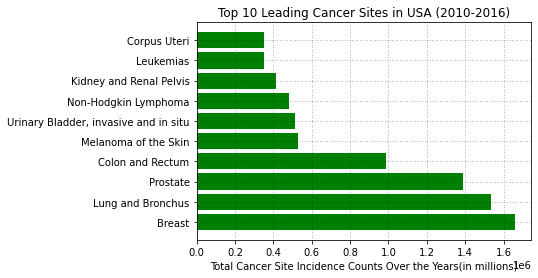

In [11]:
#Create a horizontal bar plot with descending order to show top 10 leading causes of Cancer in USA
x = df_cs_top10["Leading Cancer Sites"]
y = df_cs_top10["Count"]

plt.barh(x, y, color='green', alpha=1, align="center")
plt.title("Top 10 Leading Cancer Sites in USA (2010-2016)")
plt.xlabel("Total Cancer Site Incidence Counts Over the Years(in millions)")
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='black')

plt.show()

### (B) Year wise 10 leading cancer sites in US

In [12]:
# Yearlwise top causes
df_yearwise = df_cleaned.groupby(['Year', 'Leading Cancer Sites']).agg({'Count': sum})
df_yr = df_yearwise['Count'].groupby('Year', group_keys=False)
df = df_yr.apply(lambda x: x.sort_values(ascending=False).head(10))

# Converting to dataframe
df_unstack = df.unstack(level = -1)
#df_unstack

In [13]:
# adding population column for each year
df_pop = pd.merge(df_unstack, pop_us, on = 'Year', how = 'inner')
#df_pop.head(2)

In [14]:
# Standarizing the incidence count by making it count per million
df_pop.iloc[:, 1:11] = df_pop.iloc[:, 1:11].div(df_pop["Population"], axis = 0).mul(1000000, axis = 0)
df_pop.head(3)

# dropping the population column from above df
df_final = df_pop.drop('Population', axis = 1)
df_final.head(2)

,Year,Breast,Colon and Rectum,Corpus Uteri,Kidney and Renal Pelvis,Leukemias,Lung and Bronchus,Melanoma of the Skin,Non-Hodgkin Lymphoma,Prostate,"Urinary Bladder, invasive and in situ"
0,2010.0,713.105,452.859,147.275,174.23,152.515,693.427,213.923,211.796,700.099,226.745
1,2011.0,733.266,448.909,150.719,178.205,157.388,689.659,222.675,214.314,713.316,228.362


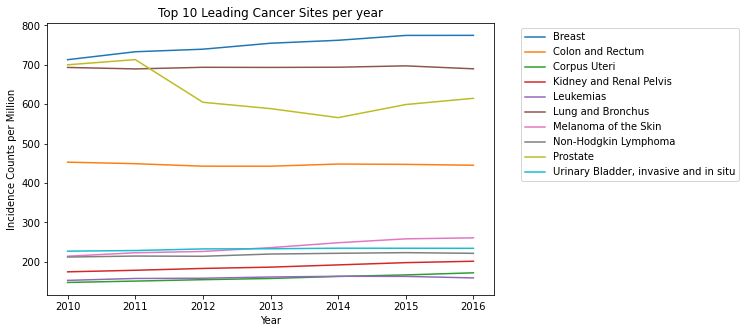

In [15]:
# plotting the yearly trend for each cancer site
plt.rcParams['figure.figsize'] = [8, 5]
df_final.plot.line(x = 'Year')
plt.title("Top 10 Leading Cancer Sites per year")
plt.xlabel("Year")
plt.ylabel("Incidence Counts per Million")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### From the above plot we can conclude:
- Breast cancer has the highest incidence count for all the years with a gradual yearly increase while Leukemias and Corpus Uteri has the lowest reported incidence. Also Leukemias shows a declining trend over the years with incidence reported for Corpus Uteri is almost constant for all all years.
- Number of per million incidence reported for Prostate Cancer shows a significant decline over the years 2012 to 2014 and then again has a gradual increase from 2015.

### Conclusion

- From the above analysis, it was seen that the per million incidences reported for various cancer sites / cancer types had a increasing trend over the years.

- The 10 leading cancer sites for over all year (2010 - 2016) and the year wise leading cancer sites consisted of the same 10 cancer sites.

- Breast cancer has the highest reported incidence over years with gradual increase each year while prostate cancer shows a significant decline in reported incidence for the period 2012 to 2014 with again a gradual increase from 2015.
